# EDA on wine quality Data

<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2015/8/19/1439993512826/4009285e-d89c-4e33-b759-58f39f479d9a-2060x1236.jpeg?width=620&quality=85&auto=format&fit=max&s=d5273fc3921da34e24c4468894ae77dd" align='left'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
  - 3.3 [Observations from Pandas Profiling before Data Processing](#section303)<br>
4. [Data Preprocessing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Outlet metrics**](#section501)<br>
    - 5.1.1 [What are the different quality types?](#section50101)<br>
    - 5.1.2 [Which outlets generate maximum revenue for the company?](#section50102)<br>
    - 5.1.3 [Top 10 Outlets in terms of Profit](#section50103)<br>
    - 5.1.4 [Outlets with highest Number of Employees](#section50104)<br>
    - 5.1.5 [Where do you find the maximum footfall in McDonald's?](#section50105)<br><br>
  - 5.2 [**Analysis based on Nutritional Value**](#section502)<br>
      - 5.2.1 [Which is the most common category on menu?](#section50201)<br>
      - 5.2.2 [How many calories (energy) on an average are present in each category of McDonald's menu?](#section50202)<br>
      - 5.2.3 [Is there any difference in the nutritional value of a grilled vs crispy chicken?](#section50203)<br>
      - 5.2.4 [On an average, how much sugar consumption happens when you order Desserts, Beverages, Smoothies and Shakes?](#section50204)<br>
      - 5.2.5 [In what sort of foods and beverages do manufacturers include fiber?](#section50205)<br> 
      - 5.2.6 [How to select Nutritious and Non-Nutritious food from menu?](#section50206)<br> 
      - 5.2.7 [Which is the most proteinaceous item on the menu?](#section50207)<br> <br>
  - 5.3 [**Analysis based on Geographical Information**](#section503)<br>
    - 5.3.1 [Which city has the highest number of McDonald's outlets per capita?](#section50301)<br>
    - 5.3.2 [Which state has the highest number of McDonald's outlets per capita?](#section50302)<br>
    - 5.3.3 [Outlet locations in India](#section50303)<br>
    - 5.3.4 [Outlet locations in India](#section50304)<br><br>
  - 5.4 [**Analysis based on Outlet metrics and Nutritional value**](#section504)<br>
    - 5.4.1 [Which outlets have most nutritious item as their best selling item?](#section50401)<br>
    - 5.4.2 [What is the Revenue of the outlet based on the category of its best selling item?](#section50402)<br>
    - 5.4.3 [How much is the Total Selling Price of the outlet based on the category of its best selling item?](#section50403)<br>
    - 5.4.4 [How much is the Total Cost Price of the outlet based on the category of its best selling item?](#section50404)<br><br>
  - 5.5 [**Analysis based on Outlet Metrics and Geographical Information**](#section505)<br>
    - 5.5.1 [Where did McDonald's entered into Joint Venture to start their Outlets?](#section50501)<br>
    - 5.5.2 [Top 10 outlets in India and US based on revenue](#section50502)<br>
    - 5.5.3 [What is the mean revenue of outlets in each US state?](#section50503)<br>
    - 5.5.4 [How much is the Gross Profit Margin of each outlet?](#section50504)<br><br>
  - 5.6 [**Analysis based on Nutritional value and Geographical information**](#section506)<br>
    - 5.6.1 [Comparison of Nutritional content of each category between India and US](#section50601)<br>
    - 5.6.2 [How are Indian menu items compare to US menu items in terms of nutrition?](#section50602)<br><br>
  - 5.7 [**Analysis based on outlet metrics, menu items, and geographical information**](#section507)<br>
    - 5.7.1 [How is the revenue generation based on different menu items in India and US?](#section50701)<br><br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

The purpose of this project is to do preliminary exploration of wine data, with a goal of selecting right attributes for classifying wine into one of the quality categories: poor, normal and excellent. Since the data is already in tidy structure, I concentrated more on finding relationships among the attributes and between attributes and the wine quality.

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_xsF01FjZm0GZbrfvt27gBdI06ZZEkpEMoI6oVVIbs2MwJ14v&s'  align='left'>

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

<a id=section3></a>
## 3. Loading Data

In [3]:
# Load the data-set.
wine_data = pd.read_csv('winequality.csv')

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section301></a>
### 3.1 Description of the Dataset

- This dataset provides details of **Wine Components and Quality** of different wine varieties. Each of these components are mentioned below:

- **fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily);
- **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;
- **citric acid** - found in small quantities, citric acid can add ‘freshness’ and flavor to wines;
- **residual sugar** - the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet;
- **chlorides** - the amount of salt in the wine;
- **free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine;
- **total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine;
- **density** - the density of water is close to that of water depending on the percent alcohol and sugar content;
- **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale;
- **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- **alcohol** - the percent alcohol content of the wine;

**The output feature is:**

- **quality** - output variable (based on sensory data, score between 0 and 10);

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIS8O_dlsSh9JX4xsqFKwug0oXM_l-qXueigw4BBRI7b_sZO-B&s" width="500px"><br/>


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


From above data, we can conclude that:

- There are no missing values.
- There is a huge difference between the 75% and max values of predictors “residual sugar”, “free sulfur dioxide” and “total sulfur dioxide”.

Above two observations, gives an indication that there are extreme values - deviations in our data set.


In [6]:
#To find what all columns it contains, of what types and if they contain any value in it or not, with the help of info() function.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


From abov details we can conclude that all 12 columns in this data-set are float/int in nature and there are no missing values.

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, I will perform **Pandas Profiling before preprocessing** on our dataset. I have named the **output file** as __wine_data_profiling_before_preprocessing.html__. 


- I will now open it and see what insights I can develop from it. 


In [7]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

     |████████████████████████████████| 133kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 614kB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 235kB 4.1MB/s eta 0:00:01


  Using cached https://files.pythonhosted.org/packages/74/3d/1ee25a26411ba0401b43c6376d2316a71addcc72ef8690b101b4ea56d76a/zipp-0.6.0-py2.py3-none-any.whl
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=148431 sha256=6489a0b8687475431a50aed1a101782242d3f0fd7c2aa95006c6b92f72b250f6
  Stored in directory: /home/nbuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27185 sha256=4db553215aeb43f8be3598be890325873037138136b89d50a2f753e0fe97f24d
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=19566 sha256=a2772492d9fbfdd9106252b743359fa50f0dfbb3a8fdb0707ae815e73dd317f8
  Stored in directory: /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pan

In [8]:
import pandas_profiling

In [9]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = wine_data.profile_report(title="Wine Data Profiling before Data Preprocessing")
profile.to_file(output_file="wine_data_profiling_before_preprocessing.html")

<a id=section303></a>
### Observations from Pandas Profiling before Data Processing
__Dataset info__:
- Number of variables: 12
- Number of observations: 6497
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 12
- Categorical = 0
- Text (Unique) = 0
- Rejected = 0

<br>


- **Dataset** has 1179 (18.1%) duplicate rows
- **citric_acid** has 151 (2.3%) zeros






<a id=section4></a>
## 4. Data Preprocessing

**By observing the above data, we can conclude −**

- Data contain only float/integer value.
- All the columns variable are non-null (no-empty or missing value).

.... and thus we can proceed with the analysis of the data.

<a id=section5></a>
## 5. Exploratory Data Analysis

## Univariate Plots

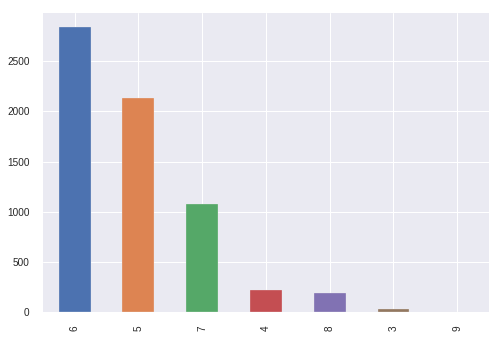

In [10]:
wine_data['quality'].value_counts().head(10).plot.bar()

#### Majority of wines are of normal quality, few are extremely poor, while few are excellent.

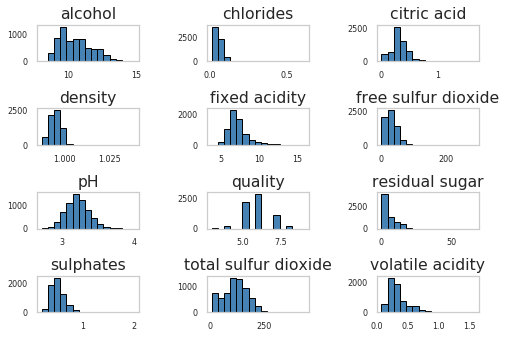

In [6]:
wine_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

## Viewing Distributions Of Attribute Variables

Text(0,0.5,'No. of Observations')

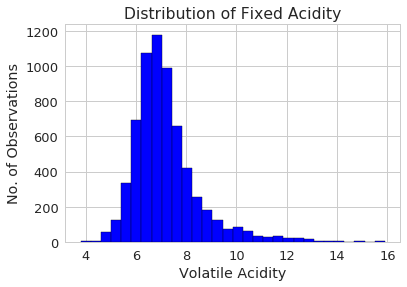

In [28]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['fixed acidity'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['fixed acidity'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Fixed Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('No. of Observations')

Text(0,0.5,'No. of Observations')

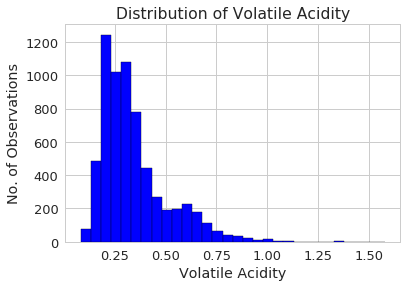

In [29]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['volatile acidity'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['volatile acidity'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('No. of Observations')

#### Both distributions for fixed acidity and volatile acidity have long positive tails.

Text(0,0.5,'No. of Observations')

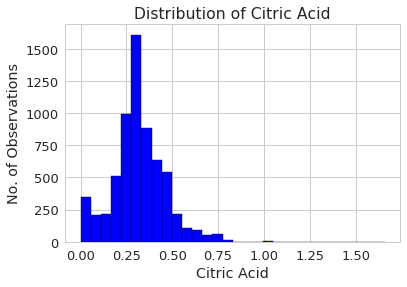

In [30]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['citric acid'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['citric acid'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('No. of Observations')

#### Citric acid distribution seems to have a few outliers. Another intresting thing to note is unsual spikes around 0.0 and 0.5. This may indicate few concentrations are more common than others.

Text(0,0.5,'No. of Observations')

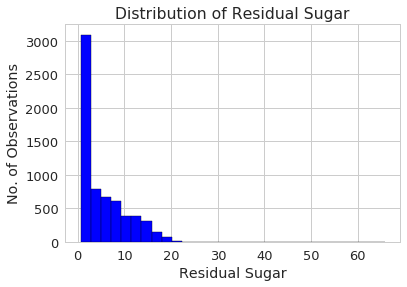

In [27]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['residual sugar'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['residual sugar'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('No. of Observations')

#### Residual sugar is highly positively skewed.

Text(0,0.5,'No. of Observations')

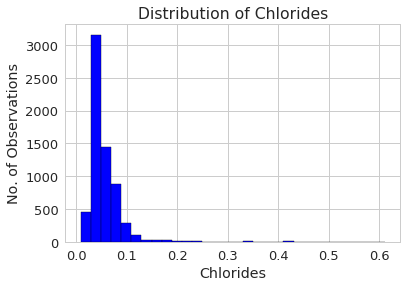

In [32]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['chlorides'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['chlorides'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('No. of Observations')

#### The plot shows the typical long positive tail, with the bulk of the values between 0.2 and 0.5.

Text(0,0.5,'No. of Observations')

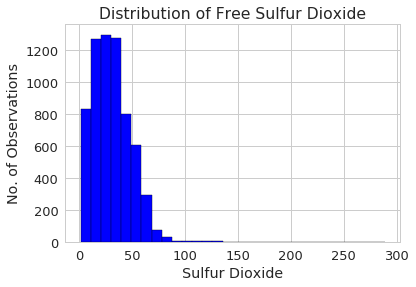

In [33]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['free sulfur dioxide'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['free sulfur dioxide'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Free Sulfur Dioxide')
plt.xlabel('Sulfur Dioxide')
plt.ylabel('No. of Observations')

Text(0,0.5,'No. of Observations')

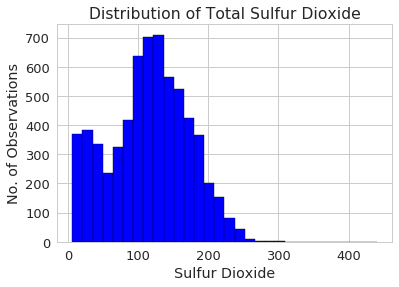

In [34]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['total sulfur dioxide'], color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(wine_data['total sulfur dioxide'], hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Total Sulfur Dioxide')
plt.xlabel('Sulfur Dioxide')
plt.ylabel('No. of Observations')

#### Distributions for SO2, both free and total, were positively skewed.Thus their extreme values were removed by discarding top 1% values. Free SO2 has quite a spiky distribution, which perhaps might indicate that some levels are more common that others, or limitation of the measurement rods. Also, total SO2 frequency distribution is clearly bimodal, due to wine type, that would be shown later under bivariate analysis.

Text(0, 0.5, 'No. of Observations')

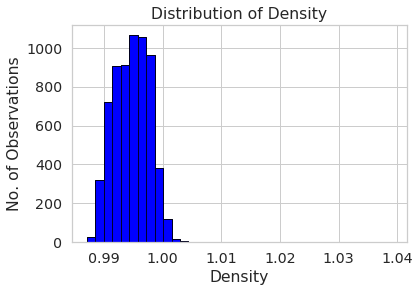

In [16]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['density'], color = 'blue', edgecolor = 'black',
         bins = int(360/10))

# seaborn histogram
sns.distplot(wine_data['density'], hist=True, kde=False, 
             bins=int(360/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Density')
plt.xlabel('Density')
plt.ylabel('No. of Observations')

Text(0, 0.5, 'No. of Observations')

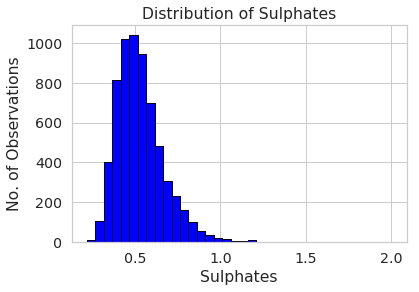

In [6]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['sulphates'], color = 'blue', edgecolor = 'black',
         bins = int(360/10))

# seaborn histogram
sns.distplot(wine_data['sulphates'], hist=True, kde=False, 
             bins=int(360/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('No. of Observations')

#### Density and sulphates ditributions, like others, had long tails. Thus outliers were removed using middle 98% of density values.

Text(0, 0.5, 'No. of Observations')

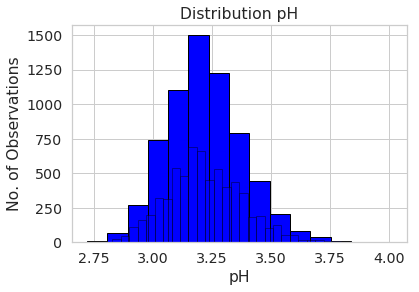

In [40]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['pH'], color = 'blue', edgecolor = 'black',
         bins = 15)

# seaborn histogram
sns.distplot(wine_data['pH'], hist=True, kde=False, 
             bins=int(360/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution pH')
plt.xlabel('pH')
plt.ylabel('No. of Observations')

#### pH distribution is almost normal with little standard deviation. Indicating almost all wines have similar pH values.

Text(0, 0.5, 'No. of Observations')

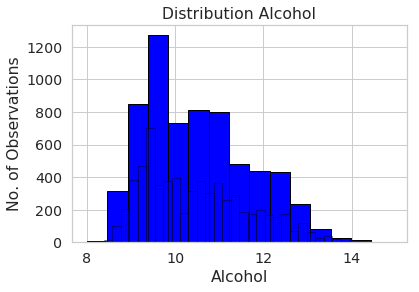

In [39]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wine_data['alcohol'], color = 'blue', edgecolor = 'black',
         bins = 15)

# seaborn histogram
sns.distplot(wine_data['alcohol'], hist=True, kde=False, 
             bins=int(360/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('No. of Observations')

#### Alcohol distribution was slightly skewed. Its mean and median values are almost same and all wines have some alcohol in them as the minimum is 8%.

### Univariate Analysis Summary: <br>

##### Majority of wines were of normal quality. So in order to predict wine quality, quality variable was grouped further. Moreover, few attributes had bimodal distributions and that was due to different wine types. For instance, attributes like, volatile acidity, citric acid, residual sugar, total sulfur dioxide had roughly two peaks and upon faceting the data, as would further be explored in bivariate analysis, are mainly due to differences between red and white wines.


## Bivariate /Multivariate Analysis
### Creating new Variable: Wine Quality
poor equals 3 to 4 quality rating wines<br>
normal equals 5 to 6 quality rating wines<br>
excellent equals 7 to 9 quality rating wines<br>
As expected, majority falls under normal category.

In [7]:
for i in range (len(wine_data['quality'])):
    num = wine_data['quality'].values[i] 
    
    if num in (3, 4,):
        wine_data['Category'][i] = "Poor"
            
    elif num in (5, 6):
        wine_data['Category'][i] = "Normal"
            
    else:
        wine_data['Category'][i] = "Excellent"
            
    

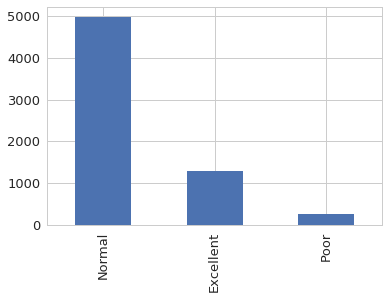

In [8]:
wine_data['Category'].value_counts().head(10).plot.bar()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('Category',data = wine_data, order = wine_data['Category'].value_counts().index,palette="PuBuGn_d")
plt.title("Wine Category Count",fontsize=18,fontweight="bold")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

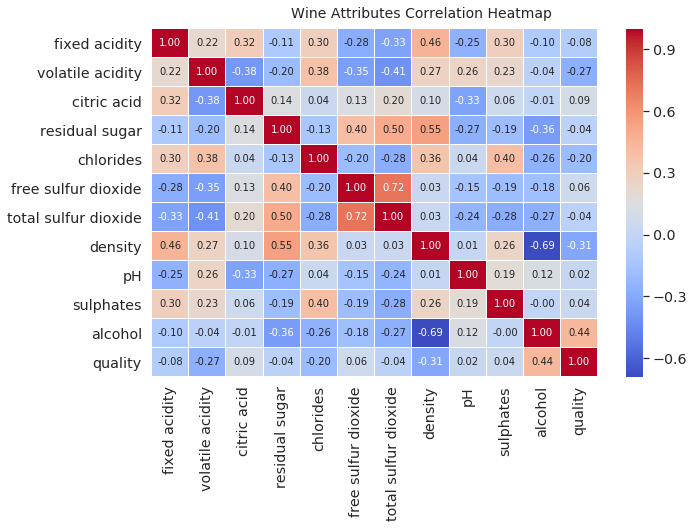

In [11]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = wine_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

- **Wine quality** is highly correlated with **alcohol quantity** and **density**. However, alcohol and density are negatively correlated. Therefore, one of them can be used as wine quality predictor. Moreover, it’s the alcohol amount that reduces the density, due to chemistry, hence alcohol amount is a good choice as a wine quality predictor.

- **Wine quality** is negatively correlated with the **volatile acidity**, as too high levels of it leads to vinegary taste, supporting the description about the data set.

- **Free SO2** and **total SO2** are highly correlated with each other and negativily correlated with the **volatile acidity**.

- **pH** is negatively correlated with **fixed acidity, citric acid, total SO2 and residual sugar**. The negative correlation with the residual sugar makes sense, since sugar has not yet oxidized into acids. Moreover, pH is positively correlated with the volatile acidity, which is a bit counter-intuitive.

- **Residual sugar** and **density** are also positively correlated, which I guess makes sense, adding sugar ought to increase the density!

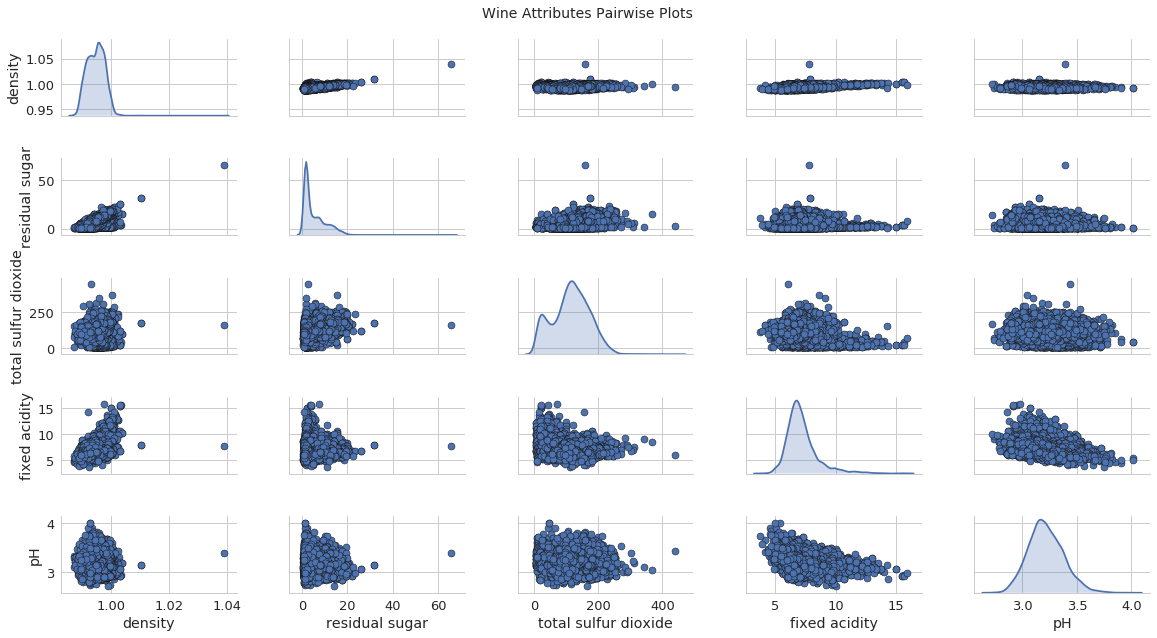

In [13]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', "pH"]
pp = sns.pairplot(wine_data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

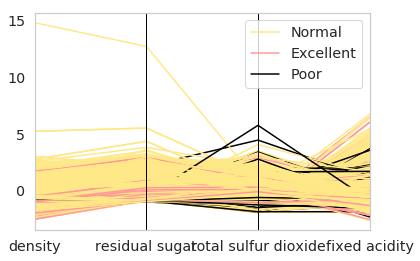

In [52]:
# Scaling attribute values to avoid few outiers
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wine_data[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wine_data['Category']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Category', color=('#FFE888', '#FF9999', '#000000'))

Text(0.5,1,'Box Plot')

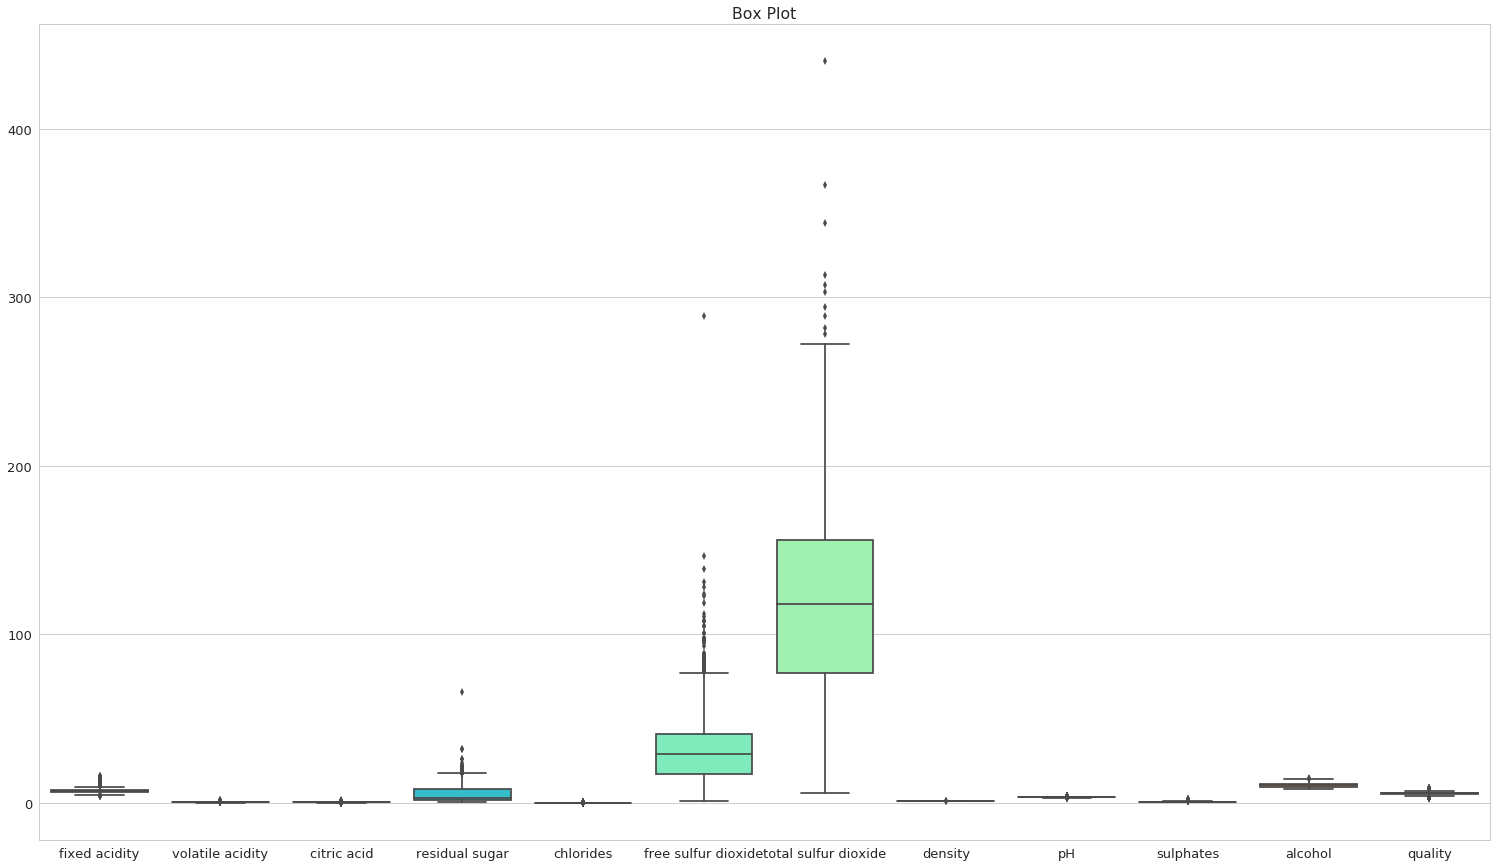

In [25]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(26,15))
sns.boxplot(data=wine_data, palette='rainbow')

plt.title('Box Plot')

Text(0.5, 1.0, 'Wine Category vs Alcohol %')

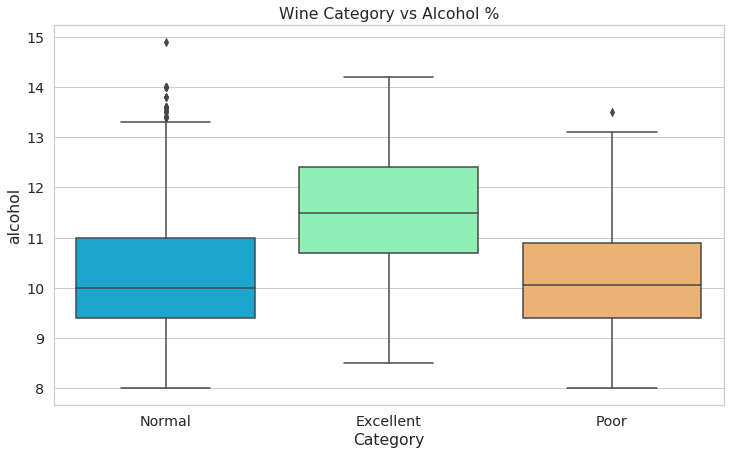

In [28]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='alcohol', palette='rainbow')

plt.title('Wine Category vs Alcohol %')

##### Excellent wines have more alcohol amounts in them compared to normal and poor labelled wines. However, looking at the density, excellent wines also have more spread in alcohol amounts than the others. In addition, I found that alcohol amount and quality had the strongest linear relationship among them.

Text(0.5, 1.0, 'Wine Category vs Volatile Acidity %')

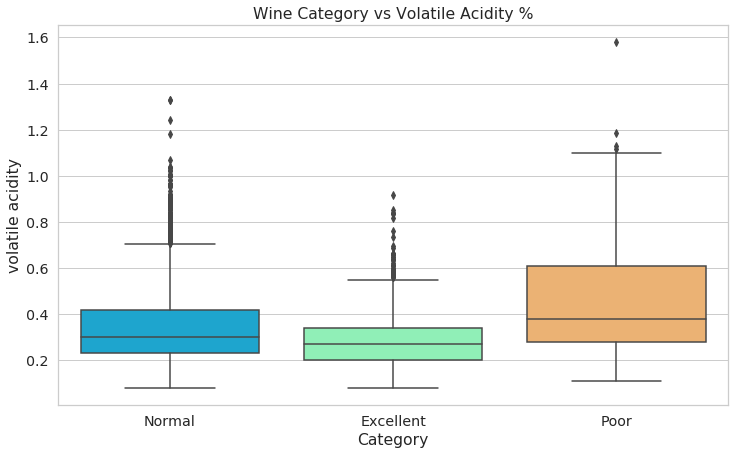

In [29]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='volatile acidity', palette='rainbow')

plt.title('Wine Category vs Volatile Acidity %')

##### As expected, excellent and normal quality wines have lower median volatile acidity compared to poor wines. Another thing to notice is that both normal and excellent wines have a lot of vinegary tasting ones among them(outliers). Moreover, despite a lot of volatile acidity in some excellent wines, being marked as excellent, suggests that other factors are there that make a wine excellent. Also, excellent and normal wines have less spread in this attribute compared to poor wines.

Text(0.5, 1.0, 'Wine Category vs Chlorides %')

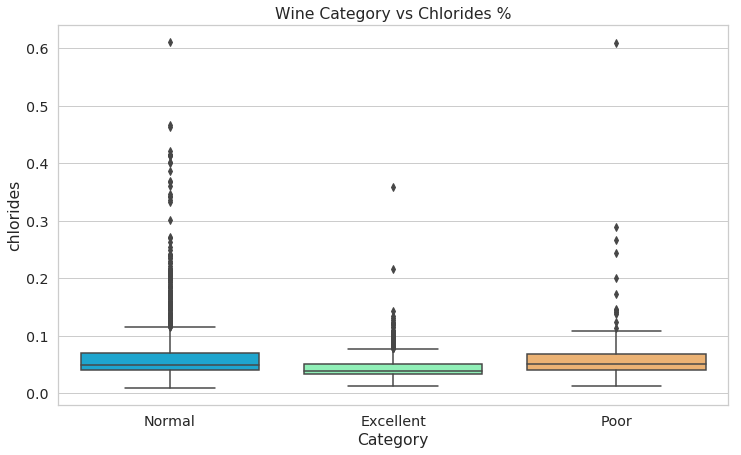

In [30]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='chlorides', palette='rainbow')

plt.title('Wine Category vs Chlorides %')

##### A large amount of outliers are observed in the chloride values in normal quality wines. In addition, excellent wines are less saltier than poor ones and have less spread compared to other qualities.

Text(0.5, 1.0, 'Wine Category vs Citric Acid %')

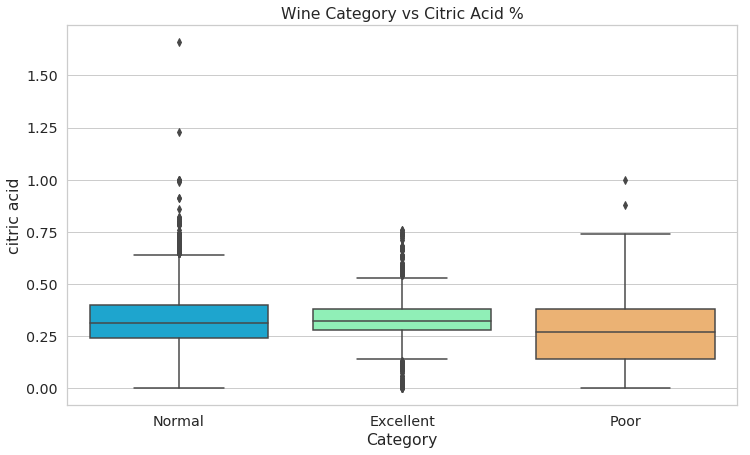

In [31]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='citric acid', palette='rainbow')

plt.title('Wine Category vs Citric Acid %')

##### Normal and excellent wines have slightly higher median citric acid amount compared with poor wines, however, they have a large number of outliers too, especially excellent wines. Another observation is that as wine quality improves, spread in citric acid concentration decreases. Plus, according to description of the data set, citric acid is added for freshness, thus it is reasonable to believe, that excellent wines would have larger amount of it.

Text(0.5, 1.0, 'Wine Category vs Total Sulfur Dioxide %')

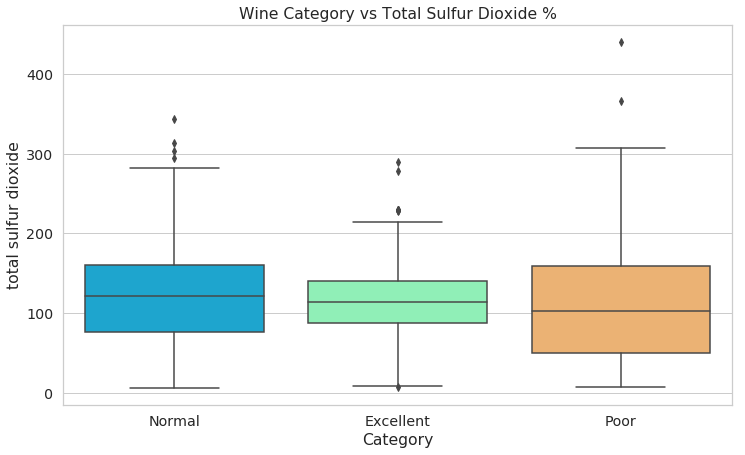

In [32]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='total sulfur dioxide', palette='rainbow')

plt.title('Wine Category vs Total Sulfur Dioxide %')

##### Median total SO2 level increases from poor to normal quality wines and then decreases, in excellent wines.However, as the wine quality improves, the interquartile range, which measures spread, shrinks considerably.

Text(0.5, 1.0, 'Wine Category vs Total pH %')

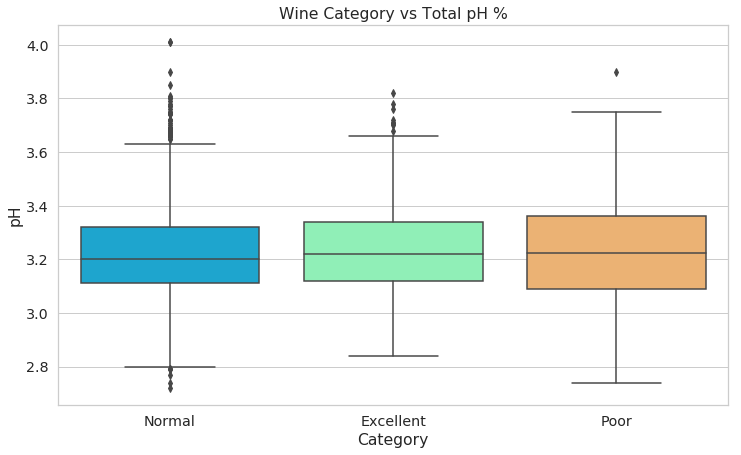

In [33]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='pH', palette='rainbow')

plt.title('Wine Category vs Total pH %')

##### Median and mean pH level is almost same for different wine quality, though, spread is smaller in normal and excellent wines.

Text(0.5, 1.0, 'Wine Category vs Residual Sugar %')

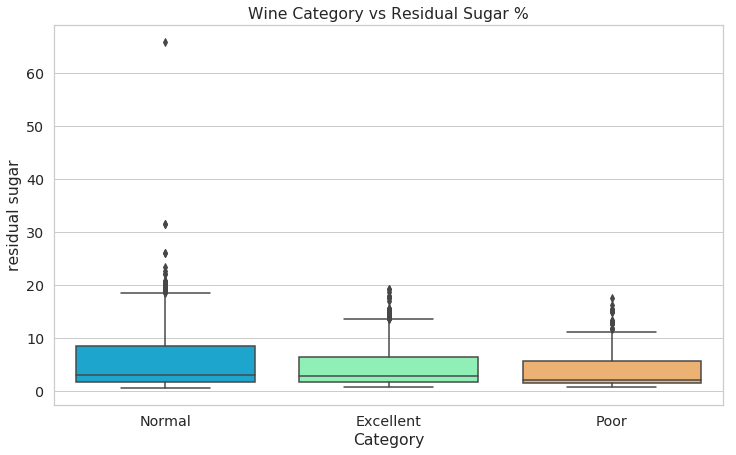

In [34]:
# Using seaborn's boxplot to plot a grouped boxplot of the Wine Category and Alcohol.

plt.figure(figsize=(12,7))
sns.boxplot(data=wine_data, x='Category', y='residual sugar', palette='rainbow')

plt.title('Wine Category vs Residual Sugar %')

##### Median residual sugar level is sligthly higher in normal and excellent wines, but difference is not that much to standout. Moreover, normal wines have larger spread in their residual sugar levels.

### Finding Relations Among The Wine Attributes

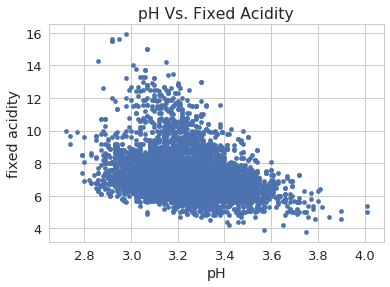

In [11]:
wine_data.plot.scatter(x='pH', y='fixed acidity', title='pH Vs. Fixed Acidity')

##### As you can see fixed acidity is dropping with increase in pH values

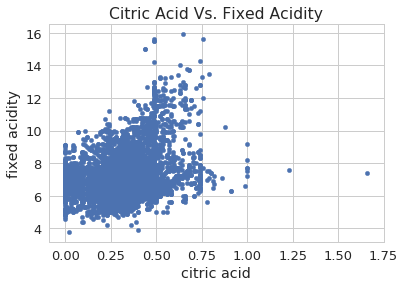

In [15]:
wine_data.plot.scatter(x='citric acid', y='fixed acidity', title='Citric Acid Vs. Fixed Acidity')

###### With increase in citric acid , fixed acidity also increases.

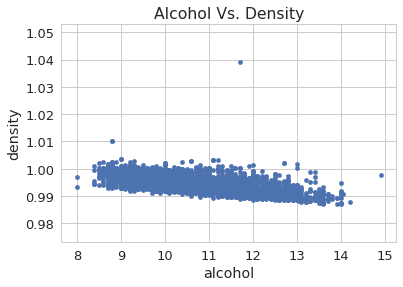

In [16]:
# Scatter Plot - With PANDAS
wine_data.plot.scatter(x='alcohol', y='density', title='Alcohol Vs. Density')

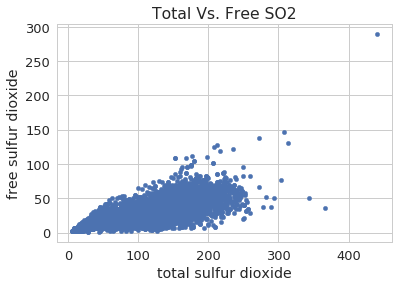

In [17]:
# Scatter Plot - With PANDAS
wine_data.plot.scatter(x='total sulfur dioxide', y='free sulfur dioxide', title='Total Vs. Free SO2')

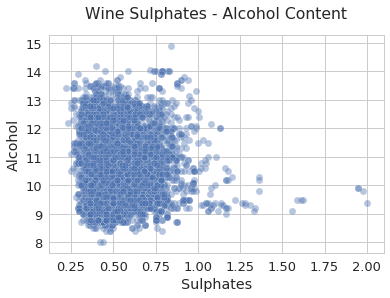

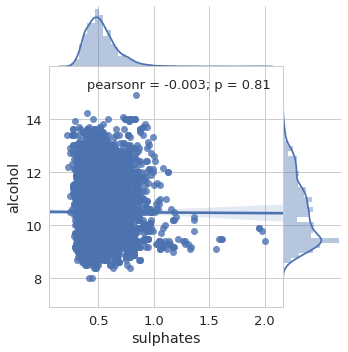

In [18]:
# Scatter Plot
plt.scatter(wine_data['sulphates'], wine_data['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wine_data,
                   kind='reg', space=0, size=5, ratio=4)

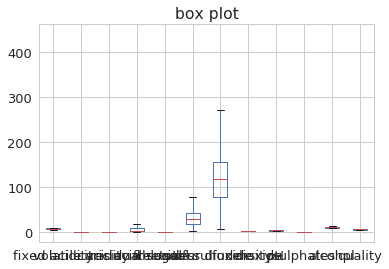

In [19]:
wine_data.plot(kind='box',title='box plot')

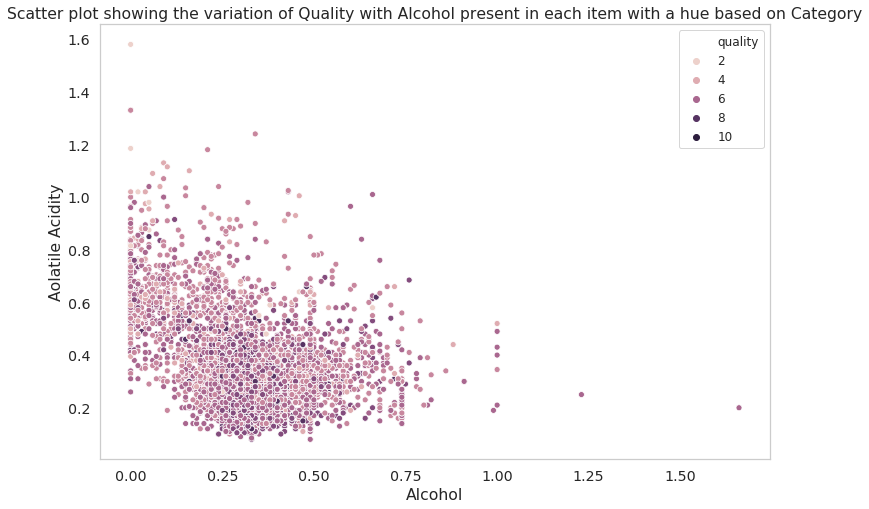

In [38]:
# Using seaborn's scatterplot function to plot the scatter plot for the Energy and Sugars columns.
# Setting hue='Category' to give different colors to the data points based on the category they belong to.

plt.figure(figsize=(12,8))
sns.scatterplot(data=wine_data, x='citric acid', y='volatile acidity', hue='quality')

plt.xlabel('Alcohol')
plt.ylabel('Aolatile Acidity')
plt.title('Scatter plot showing the variation of Quality with Alcohol present in each item with a hue based on Category')
plt.grid(False)
plt.legend(fontsize=12)

### Conclusion

**We can observe the following, for each feature:**

- **fixed acidity** - besides the smallest quality (3), mean value and variance increases with quality;
- **volatile acidity** - smaller means and smaller variance results in increasing quality;
- **citric acid** - quality increases with the mean value;
- **residual sugar** - highest quality has small mean, variance and less outliers;
- **chlorides** - highest quality has smaller mean, variance and less outliers;
- **free sulfur dioxide** - smaller mean and variance are for both small (3) and high quality (8);
- **total sulfur dioxide** - smaller mean and variance are for both small (3) and high quality (8);
- **density** - smaller mean, larger variance for higher quality;
- **pH** - smaller values for higher quality;
- **sulphates** - higher mean, smaller variance, less outliersfor higher quality;
- **alcohol** - higher mean values, larger variance, less outliers for higher quality;

### Reflections
As my main goal was to explore the data set in view of building a wine quality classifier, I was slightly able to improve compared to just marking all the wines as normal, which I consider my success. However, my features selected after EDA were not much rich. I tried several multivariate plots in order to find a good separation between wine qualities, but I failed to do that, as there were huge mixes among each quality class. However, I think, if I had more attributes available, for instance, wine price, brand ratings, maunfactoring information etc, I would have been able to construct a better classifier. Second, I think, the data set must have more representative wines of poor and excellent qualities, and with this constraint accompanying several other attribues,I would like to improve the classifying task further. Right now, I can build a good wine type classifier with this data set. For my future work, I would like to perform EDA on much richer and representative data set, that include wines from whole lot of other countries not just Portuguese “Vinho Verde” wine. Plus,I have just used K-nearest-neighbor classifier, which according to some people,usually gets the job done. Exploring other models like logistic regression, LDA, QDA and famous support vector machines, would definitely improve on the task with much richer and complete data set.
